In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [2]:
!pip install wordcloud


In [3]:
!pip install folium

In [4]:
import folium as folium
import folium.plugins as plugins
import wordcloud as wordcloud

In [5]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [6]:
baza1 = pd.read_csv("/Users/ML/Desktop/bootcamp/python/projekt/archive (4)/restaurant-menus.csv")
baza1

restaurant_id           category   
0                    1  Extra Large Pizza  \
1                    1  Extra Large Pizza   
2                    1  Extra Large Pizza   
3                    1  Extra Large Pizza   
4                    1  Extra Large Pizza   
...                ...                ...   
3375206          40227        Kid’s Mains   
3375207          40227          Beverages   
3375208          40227          Beverages   
3375209          40227           Desserts   
3375210          40227           Desserts   

                                        name   
0                    Extra Large Meat Lovers  \
1                        Extra Large Supreme   
2                      Extra Large Pepperoni   
3        Extra Large BBQ Chicken &amp; Bacon   
4                       Extra Large 5 Cheese   
...                                      ...   
3375206                           Lion Plate   
3375207                          Soft Drinks   
3375208                             Iced Tea   
3375209                 Sesame Balls (4 pcs)   
3375210               Fried Biscuits (4 pcs)   

                                               description      price  
0                                               Whole pie.  15.99 USD  
1                                               Whole pie.  15.99 USD  
2                                               Whole pie.  14.99 USD  
3                                                Whole Pie  15.99 USD  
4                                               Whole pie.  14.99 USD  
...                                                    ...        ...  
3375206  BBQ skewer two pices and fantail shrimp two pi...   8.55 USD  
3375207                                                NaN   1.95 USD  
3375208                                                NaN   1.95 USD  
3375209                                                NaN   3.95 USD  
3375210                                                NaN   3.95 USD  

[3375211 rows x 5 columns]

In [7]:
baza2 = pd.read_csv("/Users/ML/Desktop/bootcamp/python/projekt/archive (4)/restaurants.csv")
baza2

id  position                                            name  score   
0          1        19               PJ Fresh (224 Daniel Payne Drive)    NaN  \
1          2         9                  J' ti`'z Smoothie-N-Coffee Bar    NaN   
2          3         6  Philly Fresh Cheesesteaks (541-B Graymont Ave)    NaN   
3          4        17         Papa Murphy's (1580 Montgomery Highway)    NaN   
4          5       162                Nelson Brothers Cafe (17th St N)    4.7   
...      ...       ...                                             ...    ...   
40222  40223        54     Mangia la pasta! (5610 N Interstate Hwy 35)    4.8   
40223  40224        53                   Wholly Cow Burgers  (S Lamar)    4.6   
40224  40225        52                                 EurAsia Ramen 3    4.7   
40225  40226        51                        Austin's Habibi (5th St)    4.7   
40226  40227        50                                     Beijing Wok    4.4   

       ratings                                           category price_range   
0          NaN                      Burgers, American, Sandwiches           $  \
1          NaN   Coffee and Tea, Breakfast and Brunch, Bubble Tea         NaN   
2          NaN         American, Cheesesteak, Sandwiches, Alcohol           $   
3          NaN                                              Pizza           $   
4         22.0          Breakfast and Brunch, Burgers, Sandwiches         NaN   
...        ...                                                ...         ...   
40222    500.0       Pasta, Comfort Food, Italian, Group Friendly           $   
40223    245.0  American, Burgers, Breakfast and Brunch, Aller...           $   
40224    293.0  Sushi, Asian, Japanese, Exclusive to Eats, Gro...           $   
40225    208.0  Mediterranean, Gluten Free Friendly, Allergy F...          $$   
40226    254.0  Chinese, Asian, Asian Fusion, Family Friendly,...           $   

                                            full_address zip_code        lat   
0          224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365  \
1      1521 Pinson Valley Parkway, Birmingham, AL, 35217    35217  33.583640   
2              541-B Graymont Ave, Birmingham, AL, 35204    35204  33.509800   
3             1580 Montgomery Highway, Hoover, AL, 35226    35226  33.404439   
4                   314 17th St N, Birmingham, AL, 35203    35203  33.514730   
...                                                  ...      ...        ...   
40222                      5610 N I35, Austin, TX, 78751    78751  30.316248   
40223               3010 S Lamar Blvd, Austin, TX, 78704    78704  30.242816   
40224                5222 Burnet Road, Austin, TX, 78756    78756  30.324290   
40225                    817 W 5th St, Austin, TX, 78703    78703  30.269580   
40226                  8106 Brodie Ln, Austin, TX, 78749    78749  30.202210   

             lng  
0     -86.830703  
1     -86.773330  
2     -86.854640  
3     -86.806614  
4     -86.811700  
...          ...  
40222 -97.708441  
40223 -97.783821  
40224 -97.740200  
40225 -97.753110  
40226 -97.838689  

[40227 rows x 11 columns]

In [8]:
rest = baza2.dropna()
rest

id  position                                         name  score   
6          7        27                                 Jinsei Sushi    4.7  \
13        14        51                 Panera (521 Fieldstown Road)    4.6   
15        16        88     Jeni's Splendid Ice Cream (Pepper Place)    5.0   
18        19        30                                 Falafel Cafe    4.9   
19        20        40               MrBeast Burger (838 Odum Road)    3.7   
...      ...       ...                                          ...    ...   
40222  40223        54  Mangia la pasta! (5610 N Interstate Hwy 35)    4.8   
40223  40224        53                Wholly Cow Burgers  (S Lamar)    4.6   
40224  40225        52                              EurAsia Ramen 3    4.7   
40225  40226        51                     Austin's Habibi (5th St)    4.7   
40226  40227        50                                  Beijing Wok    4.4   

       ratings                                           category price_range   
6         63.0                             Sushi, Asian, Japanese           $  \
13        44.0  Breakfast and Brunch, salad, Sandwich, Family ...           $   
15        20.0  Ice Cream &amp; Frozen Yogurt, Comfort Food, D...         $$$   
18        48.0  Middle Eastern, Mediterranean, Vegetarian, Gre...           $   
19        19.0                        American, Burgers, Sandwich          $$   
...        ...                                                ...         ...   
40222    500.0       Pasta, Comfort Food, Italian, Group Friendly           $   
40223    245.0  American, Burgers, Breakfast and Brunch, Aller...           $   
40224    293.0  Sushi, Asian, Japanese, Exclusive to Eats, Gro...           $   
40225    208.0  Mediterranean, Gluten Free Friendly, Allergy F...          $$   
40226    254.0  Chinese, Asian, Asian Fusion, Family Friendly,...           $   

                                     full_address zip_code        lat   
6          1830 29th Ave S, Birmingham, AL, 35209    35209  33.480440  \
13     521 Fieldstown Road, Gardendale, AL, 35071    35071  33.651407   
15           219 29th St S, Birmingham, AL, 35233    35233  33.516600   
18           401 19th St S, Birmingham, AL, 35233    35233  33.508353   
19           838 Odum Road, Gardendale, AL, 35071    35071  33.645480   
...                                           ...      ...        ...   
40222               5610 N I35, Austin, TX, 78751    78751  30.316248   
40223        3010 S Lamar Blvd, Austin, TX, 78704    78704  30.242816   
40224         5222 Burnet Road, Austin, TX, 78756    78756  30.324290   
40225             817 W 5th St, Austin, TX, 78703    78703  30.269580   
40226           8106 Brodie Ln, Austin, TX, 78749    78749  30.202210   

             lng  
6     -86.790440  
13    -86.819247  
15    -86.789950  
18    -86.803170  
19    -86.826260  
...          ...  
40222 -97.708441  
40223 -97.783821  
40224 -97.740200  
40225 -97.753110  
40226 -97.838689  

[19118 rows x 11 columns]

In [9]:
z = rest.value_counts(subset="category",  sort=True, ascending=False, ).head(25)
z

category
American, Burgers, Fast Food                                                              556
Burritos, Fast Food, Mexican                                                              344
Burgers, American, Sandwiches                                                             331
Fast Food, Sandwich, American                                                             315
Mexican, Latin American, New Mexican                                                      289
Bakery, Breakfast and Brunch, Cafe, Coffee &amp; Tea                                      258
American, Fast Food, Burgers                                                              242
American, burger, Fast Food, Family Meals                                                 220
American, burger, Fast Food                                                               219
Healthy, Mexican                                                                          180
Asian, Chinese, Family Meals                       

In [10]:
z = rest.value_counts(subset="category",  sort=True, ascending=False, ).head(25)
b =z.index
b

Index(['American, Burgers, Fast Food', 'Burritos, Fast Food, Mexican',
       'Burgers, American, Sandwiches', 'Fast Food, Sandwich, American',
       'Mexican, Latin American, New Mexican',
       'Bakery, Breakfast and Brunch, Cafe, Coffee &amp; Tea',
       'American, Fast Food, Burgers',
       'American, burger, Fast Food, Family Meals',
       'American, burger, Fast Food', 'Healthy, Mexican',
       'Asian, Chinese, Family Meals', 'Pizza, American, Italian',
       'American, Chicken, Family Meals, Fried Chicken, Comfort Food',
       'Breakfast and Brunch, salad, Sandwich, Family Meals, Pizza, Healthy, American, Chicken',
       'American, Fast Food, wings, Family Meals, Family Friendly',
       'Chinese, Asian, Asian Fusion',
       'Cafe, Coffee &amp; Tea, Breakfast and Brunch, Bakery',
       'Sandwich, American', 'Burgers, American, Sandwiches, Family Meals',
       'American, Burgers',
       'Ice Cream + Frozen Yogurt, Burgers, Chicken, American', 'Pizza',
       'Breakfa

In [11]:
L = rest.loc[rest.category.isin(b)]
L.describe(include='all')

id     position          name        score      ratings   
count    4788.000000  4788.000000          4788  4788.000000  4788.000000  \
unique           NaN          NaN          4765          NaN          NaN   
top              NaN          NaN  Panera Bread          NaN          NaN   
freq             NaN          NaN            11          NaN          NaN   
mean    20270.719298    56.199457           NaN     4.531099    75.053885   
std     11100.178832    65.667170           NaN     0.282081    63.438760   
min        14.000000     1.000000           NaN     2.500000    10.000000   
25%     11331.250000     8.000000           NaN     4.400000    27.000000   
50%     19968.500000    27.500000           NaN     4.600000    58.000000   
75%     29152.250000    82.000000           NaN     4.700000   100.000000   
max     40132.000000   300.000000           NaN     5.000000   500.000000   

                            category price_range   
count                           4788        4788  \
unique                            25           3   
top     American, Burgers, Fast Food           $   
freq                             556        4549   
mean                             NaN         NaN   
std                              NaN         NaN   
min                              NaN         NaN   
25%                              NaN         NaN   
50%                              NaN         NaN   
75%                              NaN         NaN   
max                              NaN         NaN   

                                    full_address zip_code          lat   
count                                       4788     4788  4788.000000  \
unique                                      4756      988          NaN   
top     7101 Democracy Blvd, Bethesda, MD, 20817    22192          NaN   
freq                                           4       29          NaN   
mean                                         NaN      NaN    40.576129   
std                                          NaN      NaN     5.442798   
min                                          NaN      NaN    18.355436   
25%                                          NaN      NaN    37.359910   
50%                                          NaN      NaN    39.631336   
75%                                          NaN      NaN    45.780998   
max                                          NaN      NaN    48.936240   

                lng  
count   4788.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean     -97.927127  
std       18.254188  
min     -123.011380  
25%     -120.289601  
50%      -96.663949  
75%      -77.603314  
max      -66.008330

In [2]:
#m = folium.Map(location=[38,-98], zoom_start=4.55,width="%100",height="%100", tiles ="OpenStreetMap")
#locations = list(zip(rest.lat, rest.lng))
#cluster = plugins.MarkerCluster(locations=locations,                     
 #              popups=rest["name"].tolist())  
#m.add_child(cluster)
#loc = 'Restauracje  - cała lista'
#title_html = '''
 #            <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
#m.get_root().html.add_child(folium.Element(title_html))
#m

IndentationError: unexpected indent (4107054731.py, line 9)

In [13]:
m = folium.Map(location=[38,-98], zoom_start=4.50,width="%100",height="%100", tiles ="OpenStreetMap")
locations = list(zip(L.lat, L.lng))
cluster = plugins.MarkerCluster(locations=locations,                     
               popups=rest["name"].tolist())  
m.add_child(cluster)
loc = 'Restauracje  - 25 najliczniejszych kategorii'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
m.get_root().html.add_child(folium.Element(title_html))
m

In [14]:
# wzor do mapa

m = folium.Map(location=[37.09024,-95.712891], tiles="OpenStreetMap", zoom_start=4.9)
stationArr = rest[['lat','lng']]
m.add_child(plugins.HeatMap(stationArr, radius=15))

loc = 'Restauracje'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   

m.get_root().html.add_child(folium.Element(title_html))
m

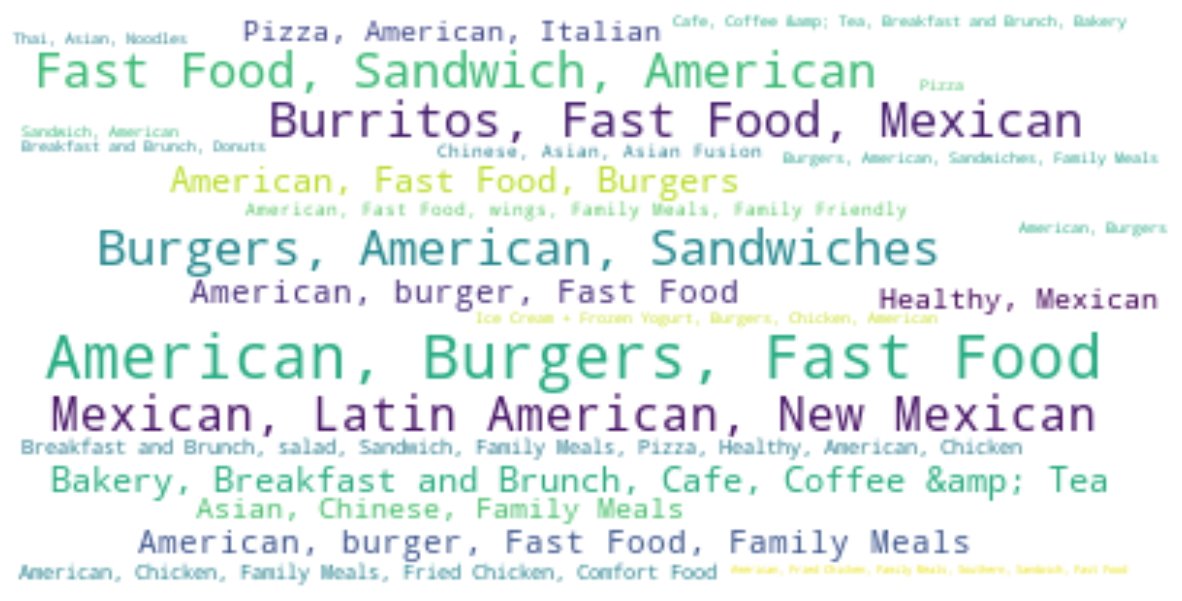

In [15]:
text = L['category'].value_counts().to_dict()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate_from_frequencies(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='count', ylabel='category'>

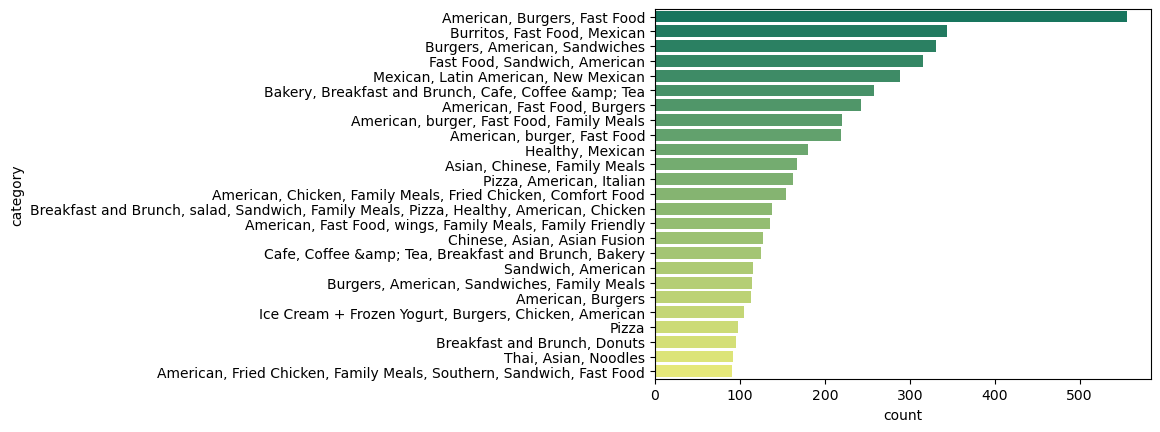

In [16]:
sns.countplot(y="category",palette='summer',data=L,order=L['category'].value_counts().head(30).index,orient="h")


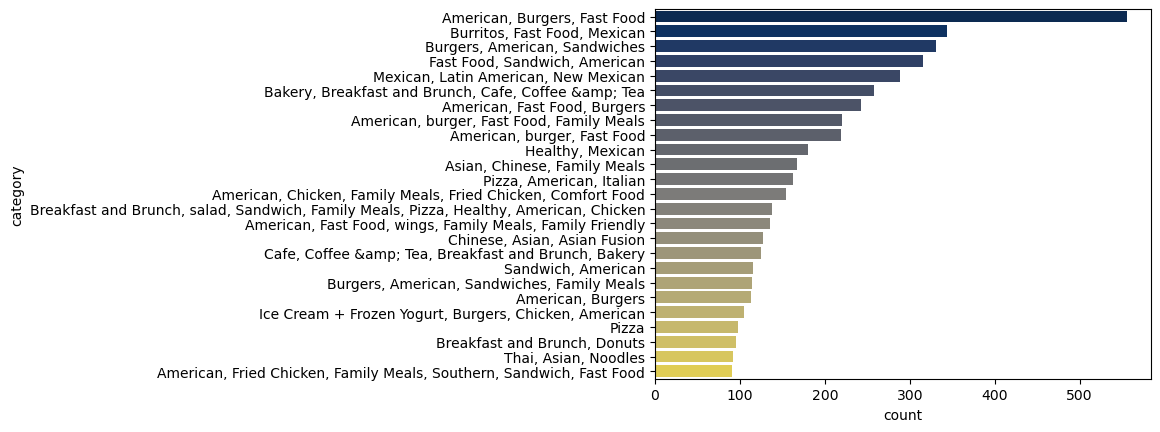

In [17]:
values = rest['category'].value_counts().values
sns.countplot(y="category",data=L,palette='cividis',order=rest['category'].value_counts().head(25).index)
plt.show()

In [20]:
d = L.groupby ('category')['score'].agg(mean).sort_values().head(25)
d
#d.sort_values(ascending=False, inplace=False)
#d

category
American, Chicken, Family Meals, Fried Chicken, Comfort Food                              4.333766
Burritos, Fast Food, Mexican                                                              4.377907
American, Fast Food, wings, Family Meals, Family Friendly                                 4.386667
American, burger, Fast Food, Family Meals                                                 4.392273
Burgers, American, Sandwiches, Family Meals                                               4.413158
American, burger, Fast Food                                                               4.415525
Ice Cream + Frozen Yogurt, Burgers, Chicken, American                                     4.444762
American, Fast Food, Burgers                                                              4.449587
American, Burgers, Fast Food                                                              4.466906
Pizza, American, Italian                                                                  4.495092
B

In [21]:
conda install matplotlib

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


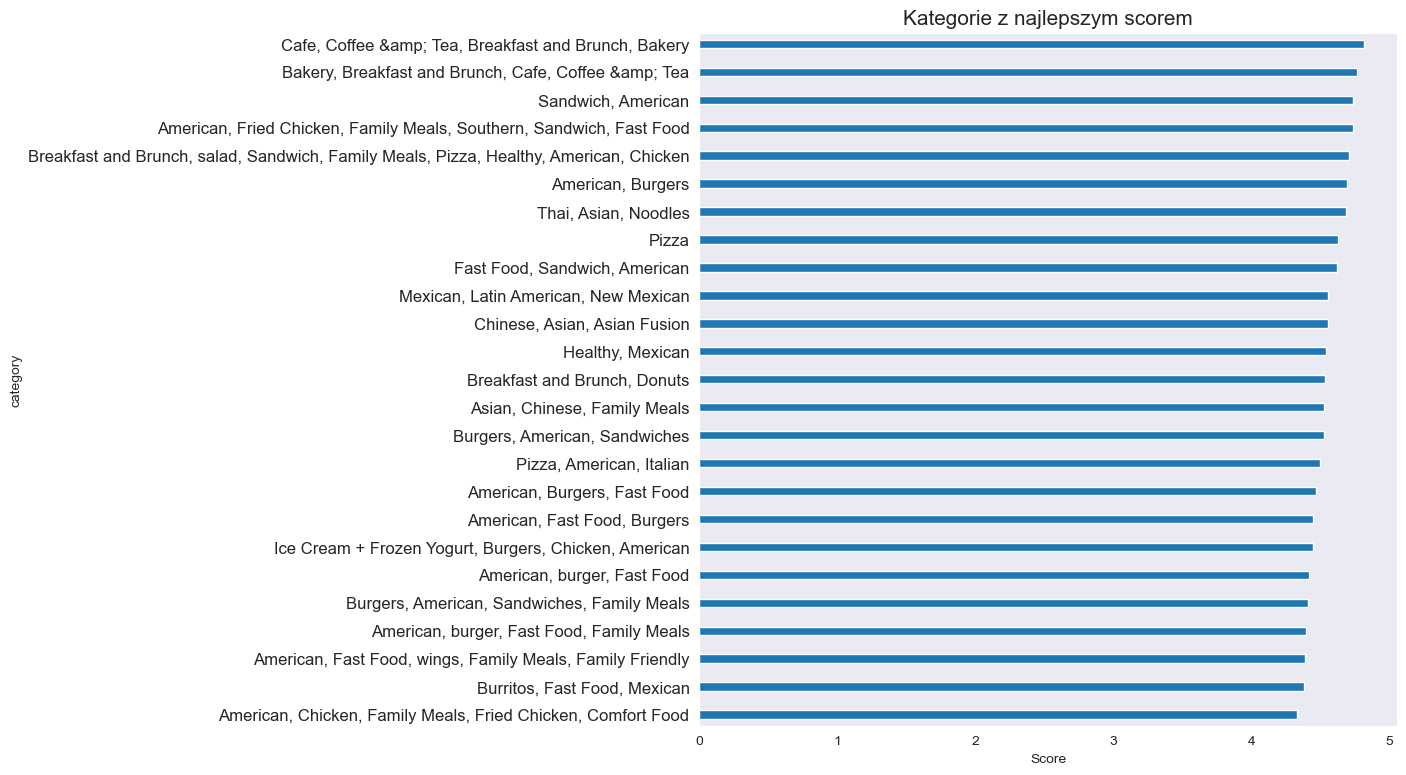

In [22]:
sns.set_style("dark")
plt.subplots(figsize=(9,9))
d.plot( kind="barh", width = 0.3)
plt.title("Kategorie z najlepszym scorem", fontsize = 15)
plt.yticks(fontsize = 12)
plt.xlabel("Score")
pass

In [23]:
L

id  position                                               name   
13        14        51                       Panera (521 Fieldstown Road)  \
34        35        80                    Starbucks (Hwy 11 and Avenue W)   
42        43         9                      Taco Bell (2300 Bessemer Rd.)   
68        69        38                                     New China Town   
116      117       116                                           Tin Roof   
...      ...       ...                                                ...   
40009  40010        12                             McDonald's® (Mopac N.)   
40010  40011         9                             Wendy's  (619 N Ih 35)   
40011  40012         3                          Shake Shack (South Lamar)   
40056  40057       249  Papa Murphy's Pizza (TX014 2110 Slaughter Lane...   
40131  40132       164                      KFC (801 E William Cannon Dr)   

       score  ratings                                           category   
13       4.6     44.0  Breakfast and Brunch, salad, Sandwich, Family ...  \
34       4.6     21.0  Bakery, Breakfast and Brunch, Cafe, Coffee &am...   
42       4.1     91.0                       Burritos, Fast Food, Mexican   
68       4.3    100.0                       Chinese, Asian, Asian Fusion   
116      3.8     18.0                      Burgers, American, Sandwiches   
...      ...      ...                                                ...   
40009    4.6     98.0                       American, Fast Food, Burgers   
40010    4.5    359.0                       American, Burgers, Fast Food   
40011    4.8    500.0                                  American, Burgers   
40056    4.6     13.0                                              Pizza   
40131    4.2    212.0  American, Fast Food, wings, Family Meals, Fami...   

      price_range                                       full_address zip_code   
13              $         521 Fieldstown Road, Gardendale, AL, 35071    35071  \
34              $  2401 Crossplex Boulevard 101, Birmingham, AL, ...    35208   
42              $           2300 Bessemer Rd., Birmingham, AL, 35208    35208   
68              $              1020 20th St S, Birmingham, AL, 35205    35205   
116             $              2709 7th Ave S, Birmingham, AL, 35233    35233   
...           ...                                                ...      ...   
40009           $               5762 MOPAC EXPY N, AUSTIN, TX, 78731    78731   
40010           $                     619 N Ih 35, Austin, TX, 78702    78702   
40011           $           1100 South Lamar Blvd, Austin, TX, 78704    78704   
40056           $        2110 Slaughter Lane West, Austin, TX, 78748    78748   
40131           $         801 E William Cannon Dr, Austin, TX, 78745    78745   

             lat        lng  
13     33.651407 -86.819247  
34     33.497944 -86.874391  
42     33.497924 -86.875792  
68     33.501114 -86.796981  
116    33.510570 -86.789610  
...          ...        ...  
40009  30.338516 -97.755727  
40010  30.266198 -97.733590  
40011  30.255931 -97.761831  
40056  30.174738 -97.824283  
40131  30.190008 -97.773135  

[4788 rows x 11 columns]

In [24]:
L.price_range.value_counts()

price_range
$      4549
$$      237
$$$       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Score a Rating dla Top 25')

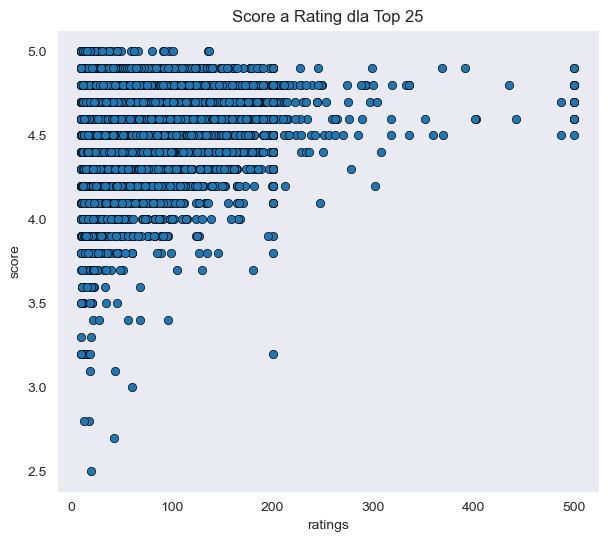

In [27]:
plt.subplots(figsize=(7,6))
sns.scatterplot(data=L, y='score', x='ratings',edgecolor = "black").set_title('Score a Rating dla Top 25')

In [28]:
f = round (L.groupby (['category'])[['score', 'ratings']].agg(np.mean).sort_values(by='ratings', ascending=False),2)
f

score  ratings
category                                                          
Breakfast and Brunch, salad, Sandwich, Family M...   4.71   126.76
American, Fried Chicken, Family Meals, Southern...   4.74   121.44
American, Fast Food, Burgers                         4.45   111.77
Cafe, Coffee &amp; Tea, Breakfast and Brunch, B...   4.81   109.54
American, Burgers                                    4.70   109.39
American, Chicken, Family Meals, Fried Chicken,...   4.33   109.03
Asian, Chinese, Family Meals                         4.53   103.49
Healthy, Mexican                                     4.54    99.43
Burgers, American, Sandwiches, Family Meals          4.41    86.72
Bakery, Breakfast and Brunch, Cafe, Coffee &amp...   4.77    84.22
Thai, Asian, Noodles                                 4.69    81.79
American, Fast Food, wings, Family Meals, Famil...   4.39    79.34
Burritos, Fast Food, Mexican                         4.38    76.42
Mexican, Latin American, New Mexican                 4.55    72.18
Chinese, Asian, Asian Fusion                         4.55    69.43
American, Burgers, Fast Food                         4.47    65.55
American, burger, Fast Food                          4.42    62.82
Ice Cream + Frozen Yogurt, Burgers, Chicken, Am...   4.44    62.50
Sandwich, American                                   4.74    58.86
Burgers, American, Sandwiches                        4.52    57.97
Pizza                                                4.63    55.41
Pizza, American, Italian                             4.50    52.30
Breakfast and Brunch, Donuts                         4.54    49.42
American, burger, Fast Food, Family Meals            4.39    48.77
Fast Food, Sandwich, American                        4.62    24.48

Text(0.5, 1.0, 'Score a Rating dla Top 25')

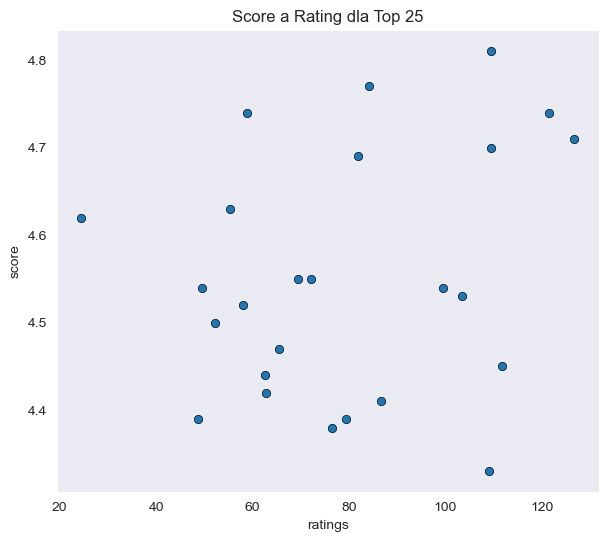

In [29]:
plt.subplots(figsize=(7,6))
sns.scatterplot(data=f, y='score', x='ratings',edgecolor = "black").set_title('Score a Rating dla Top 25')

In [32]:
filtered_df = L[L['category'].str.contains('American') == False]

In [33]:
filtered_df

id  position                                               name   
34        35        80                    Starbucks (Hwy 11 and Avenue W)  \
42        43         9                      Taco Bell (2300 Bessemer Rd.)   
68        69        38                                     New China Town   
229      230         8                    Starbucks (Magnolia City Place)   
252      253         2                   Taco Bell (1101 Forestdale Blvd)   
...      ...       ...                                                ...   
39776  39777       222               Sap's Ver Fine Thai Cuisine (Burnet)   
39782  39783       206               Madam Mam's Thai Cuisine (Brodie LN)   
39815  39816       151             Panda Express (4301 W. William Cannon)   
39875  39876        14                                Thai Taste (Austin)   
40056  40057       249  Papa Murphy's Pizza (TX014 2110 Slaughter Lane...   

       score  ratings                                           category   
34       4.6     21.0  Bakery, Breakfast and Brunch, Cafe, Coffee &am...  \
42       4.1     91.0                       Burritos, Fast Food, Mexican   
68       4.3    100.0                       Chinese, Asian, Asian Fusion   
229      4.7     57.0  Bakery, Breakfast and Brunch, Cafe, Coffee &am...   
252      4.0     26.0                       Burritos, Fast Food, Mexican   
...      ...      ...                                                ...   
39776    4.8    102.0                               Thai, Asian, Noodles   
39782    4.7    500.0                               Thai, Asian, Noodles   
39815    4.5    119.0                       Asian, Chinese, Family Meals   
39875    4.7    168.0                               Thai, Asian, Noodles   
40056    4.6     13.0                                              Pizza   

      price_range                                       full_address zip_code   
34              $  2401 Crossplex Boulevard 101, Birmingham, AL, ...    35208  \
42              $           2300 Bessemer Rd., Birmingham, AL, 35208    35208   
68              $              1020 20th St S, Birmingham, AL, 35205    35205   
229             $           659 Fieldstown Rd, Gardendale, AL, 35071    35071   
252             $        1101 Forestdale Blvd, Birmingham, AL, 35214    35214   
...           ...                                                ...      ...   
39776          $$                  5800 Burnet Rd, Austin, TX, 78756    78756   
39782           $           9911 Brodie Lane #600, Austin, TX, 78748    78748   
39815           $        4301 W William Cannon Dr, Austin, TX, 78749    78749   
39875           $                      7010 TX-71, Austin, TX, 78735    78735   
40056           $        2110 Slaughter Lane West, Austin, TX, 78748    78748   

             lat        lng  
34     33.497944 -86.874391  
42     33.497924 -86.875792  
68     33.501114 -86.796981  
229    33.650425 -86.823871  
252    33.557972 -86.889709  
...          ...        ...  
39776  30.333400 -97.741010  
39782  30.184520 -97.848580  
39815  30.222479 -97.840629  
39875  30.235883 -97.875436  
40056  30.174738 -97.824283  

[1487 rows x 11 columns]

In [1]:
#m = folium.Map(location=[38,-98], zoom_start=4.50,width="%100",height="%100", tiles ="OpenStreetMap")
#locations = list(zip(filtered_df.lat, filtered_df.lng))
#cluster = plugins.MarkerCluster(locations=locations,                     
 #              popups=rest["name"].tolist())  
#m.add_child(cluster)
#loc = 'Restauracje  - 25 najliczniejszych kategorii'
#title_html = '''
 #            <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
#m.get_root().html.add_child(folium.Element(title_html))
#m

IndentationError: unexpected indent (3480132380.py, line 9)